# InceptionV2/V3

## Rethinking the Inception Architecture for Computer Vision

The inception V2/V3 architecture based on the paper - [Rethinking the Inception Architecture for Computer Vision](https://arxiv.org/abs/1512.00567) suggests many architectural level upgrades to the Inception V1. These upgrades are aimed  to reduce computational complexities and inprove the model training and performance. The authors suggest a few general design principles and optimization ideas that are useful for scaling up convolution networks in efficient ways.

### General Design Principles

1. ***Avoid representational bottlenecks, especially early in the network***. Bottlenecks with extreme compression should be avoided. The dimensionality should gently decrease from the inputs to the outputs before reaching the final representation used for the task at hand. The dimensionality roughly provides a rough estimate of information content. So, down scale the input image and the feature maps gently.

2. ***Higher dimensional representations are easier to process locally within a network***. Convolving through a variety of filters parallely allows for more different feature maps to be generated and the netowrk will learn better representations since it will have access to a veriety of information and feature representations resulting networks to train faster.

3. ***Spatial aggregation can be done over lower dimensional embeddings without much or any loss in representational power.*** Like in the inception modules, a 1x1 convolution before a 3x3 or 5x5 convolution will not cause serious adverse effects and promotes faster learning. Since the ajdacent units (pixels) are strongly correlated results in much less loss of information during dimension reduction.

4. ***Balance the width and depth of the network***. Optimal performance of the network can be reached by balancing the number of filters per stage and the depth of the network. Increasing both the width and the depth in parallel can contribute to higher quality networks.


### Factorizing Large Convolutions

#### Technique 1

This enhancement is based on the **Design Principle 3** discussed above.

Gven the success achieved in terms of the computational costs by applying 1x1 before 3x3 or 5x5 convolutions in Inception V1, the authors in InceptionV2/V3 propose an idea to breakdown or factorize convolutions with spatially larger filters (eg. 5x5 or 7x7) into smaller convolutions to further improve the computational/training cost.

A 5 × 5 convolution over a grid is **25/9 = 2.78** times more expensive than a 3 × 3 convolution withthe same number of filters. However,  a 5×5 filter is able to capture detailed dependencies and features further away in the earlier layers better compared to a 3x3 colvolution. So any reduction of the size of the filters would come at the cost of **expressive power** of the filters/model. To mitigate this loss of expressive power by using a filter of lower dimension, the authors come up with an approach that would not only reduce the computational complexity but also give the same receptive field and expressiveness.

**Factorize 5x5 convolution into two stacked 3x3 convolution.** 

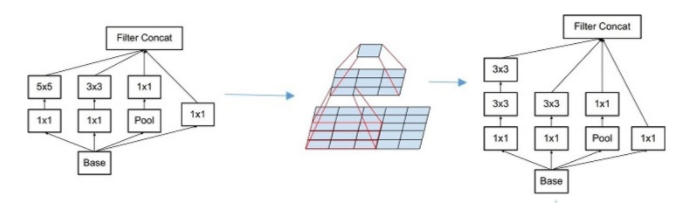

**Image Source:** [Figure 3, 4, 5](https://arxiv.org/pdf/1512.00567.pdf)

The above setup reduces the parameter count by sharing the weights between adjacent tiles and results in a **(9+9)/25** computation load reduction with a relative gain of **28%** by applying factorization.

Suppose we have a 5x5 input image and after a convolution, we want to produce a 5x5 output image. Comparing the number of operations between a single 5x5 convolution and two stacked 3x3 convolutions.

With a 5x5 convolution, and a padding of 2:   **no. of operations = 5x5x5x5 = 25x25**
    
With 2 stacked 3x3 convolution, and a padding of 1 for each convolution: **no. of operations = 5x5x3x3 + 5x5x3x3 = 25x9 + 25x9 = 25x18**
    
Thus, 2 stacked 3x3 convolutions reduce the computation load by **((25x18)/(25x25) = 18/25 = (9+9)/25)** resulting in a  gain of **28%** by this factorization ((1 - 18/25)*100 = 28%).


#### Technique 2

**Can further smaller factorization be achieved below 3x3? YES**

This enhancement is also based on the **Design Principle 3** discussed above.

The authors suggest that the convolutions can be factorized into further smaller units achieving much more gains compared to technique 1 above. They factorize a **n x n** convolution into a combination of stacked **1 x n** convolution followed by **n x 1** convolution known as ***asymmetric convolution***.  

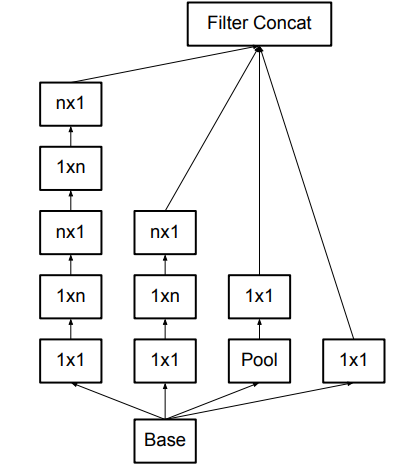

**Image Source:** [Figure 6](https://arxiv.org/pdf/1512.00567.pdf)

Factorizing a 3x3 convolution assymetrically using a 3×1 convolution followed by a 1×3 convolution is equivalent to sliding a two layer network with the same receptive field as in a 3×3 convolution. Such assymetric arrangement proves to be **33%** cheaper than a single 3x3 convolution.

Suppose we convolve a 3x3 filter on a 3x3 input/output image:
with a 3x3 convolution, and a padding of 1: **no. of operations = 3x3x3x3 = 81**.

with combination of 1x3 / 3x1 convolutions, and a padding of 1 for each convolution: **no. of operations = 3x3x1x3 + 3x3x3x1 = 54**.

Thus, a combination of 1x3 and 3x1 convolutions result in a computation saving of **((1 - (54/81)) * 100 = 33%)** via assymetric factorization.

#### Technique 3

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [2]:
from InceptionV2V3 import InceptionV2V3
inception = InceptionV2V3()

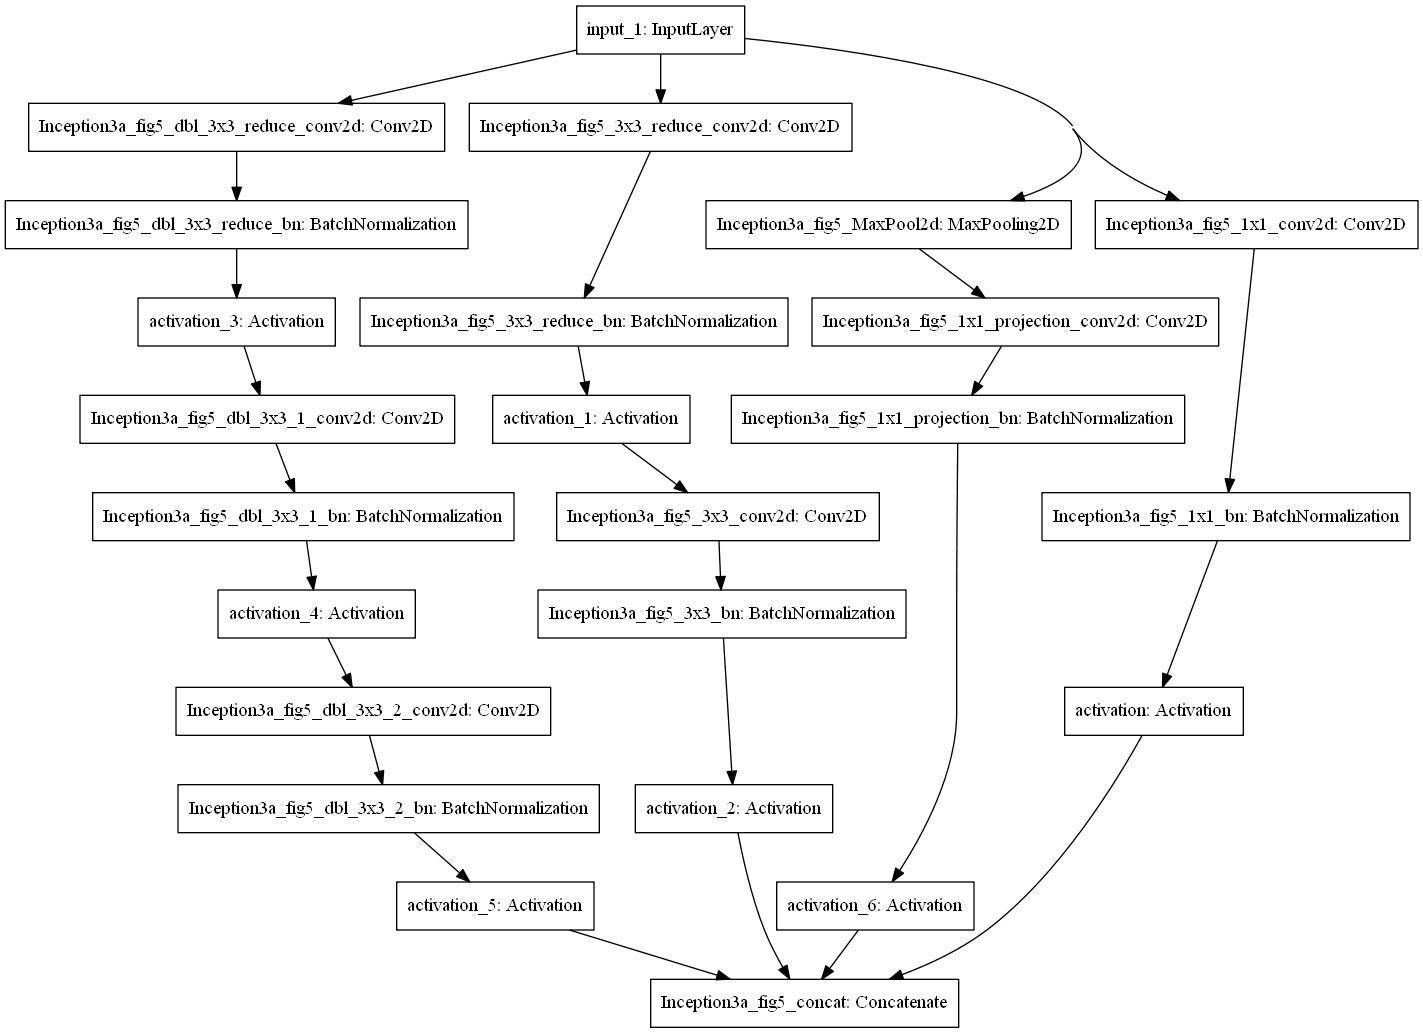

In [3]:
model5 = inception.GetInceptionNetOnFigure5()
plot_model(model5, to_file="Figure5_InceptionV3.png", show_shapes=False)

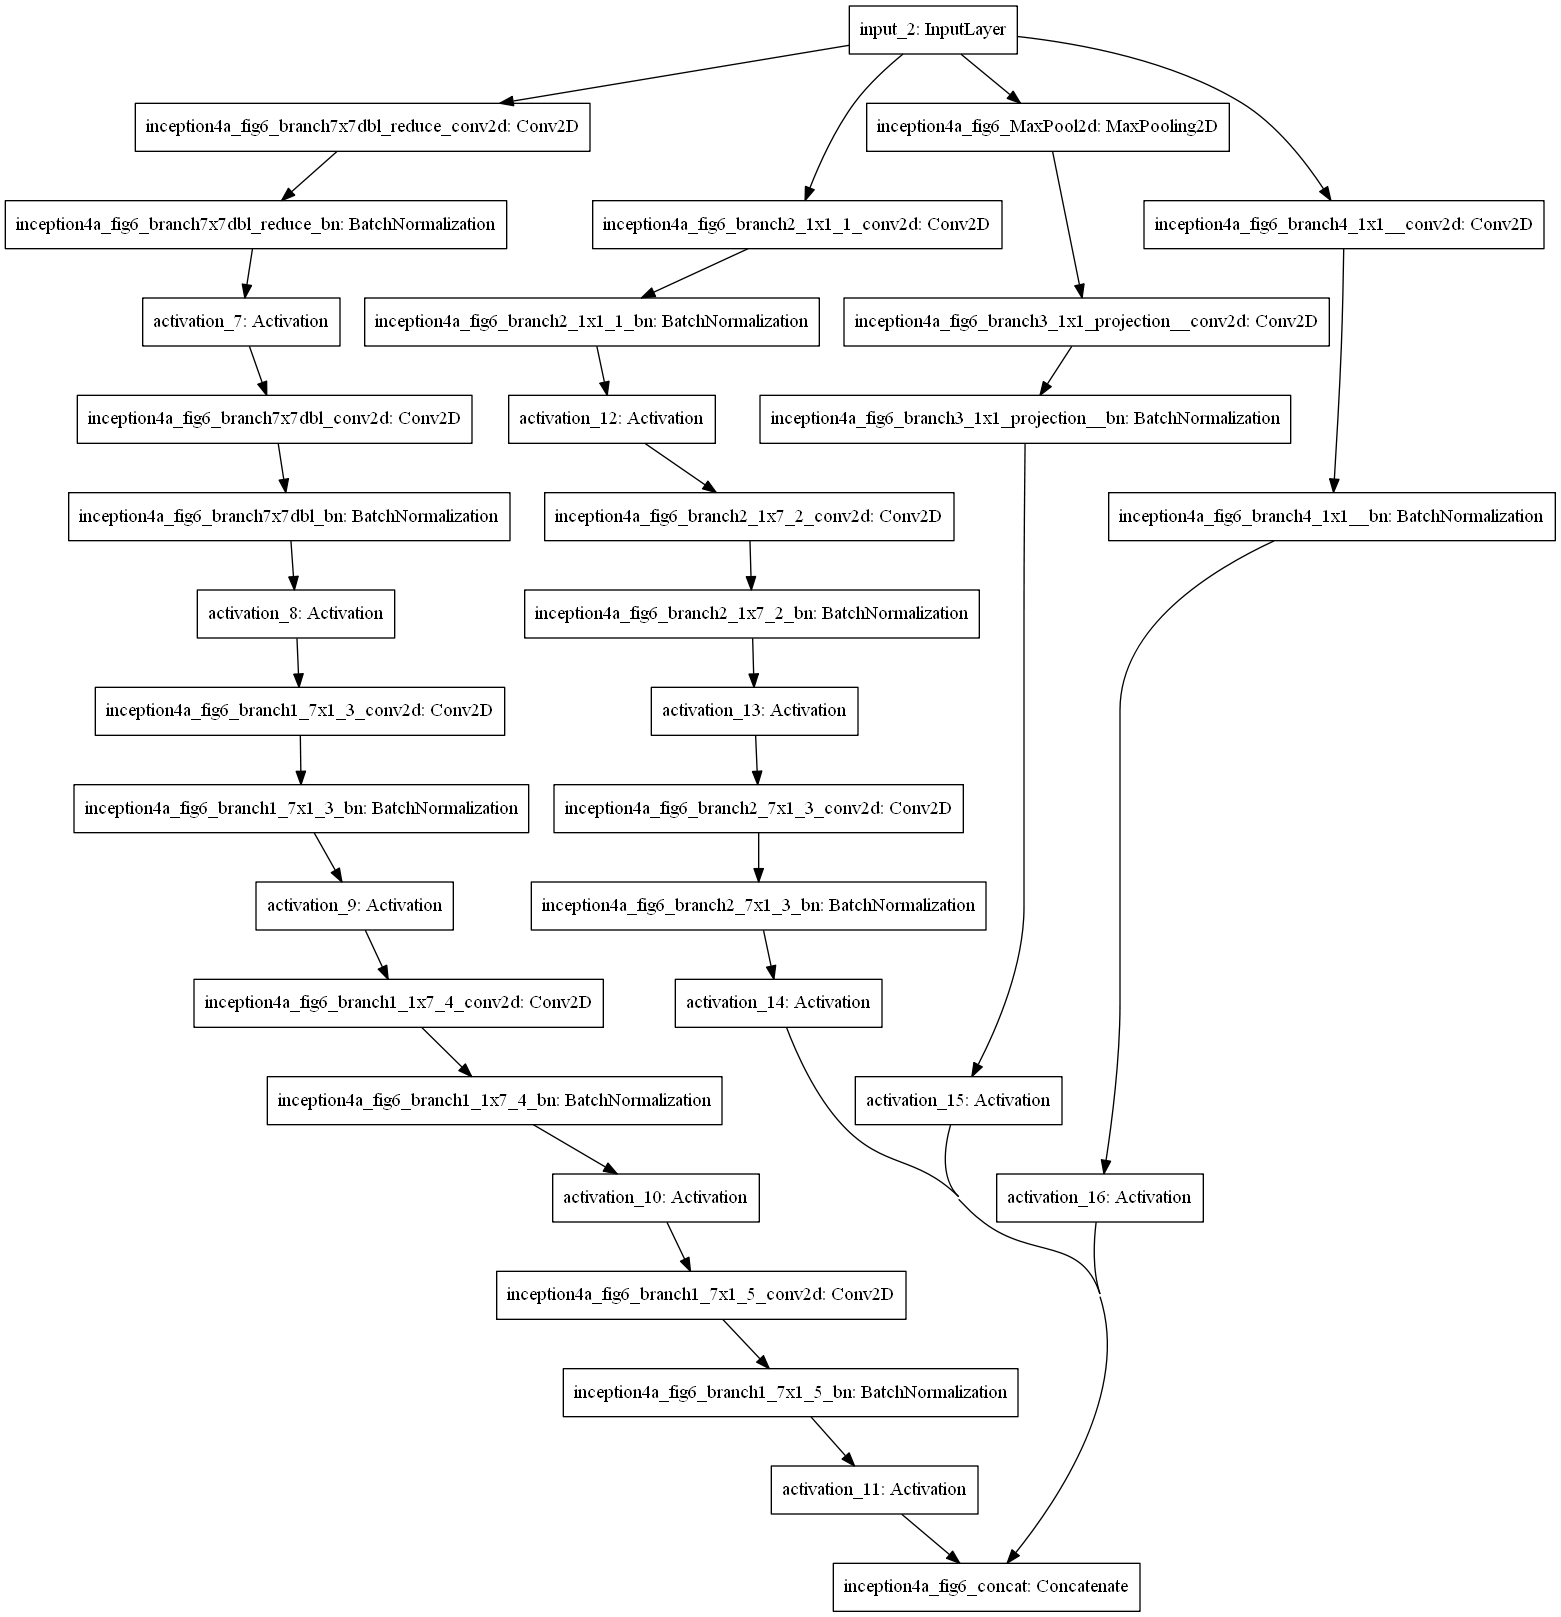

In [4]:
model6 = inception.GetInceptionNetOnFigure6()
plot_model(model6, to_file="Figure6_InceptionV3.png", show_shapes=False)

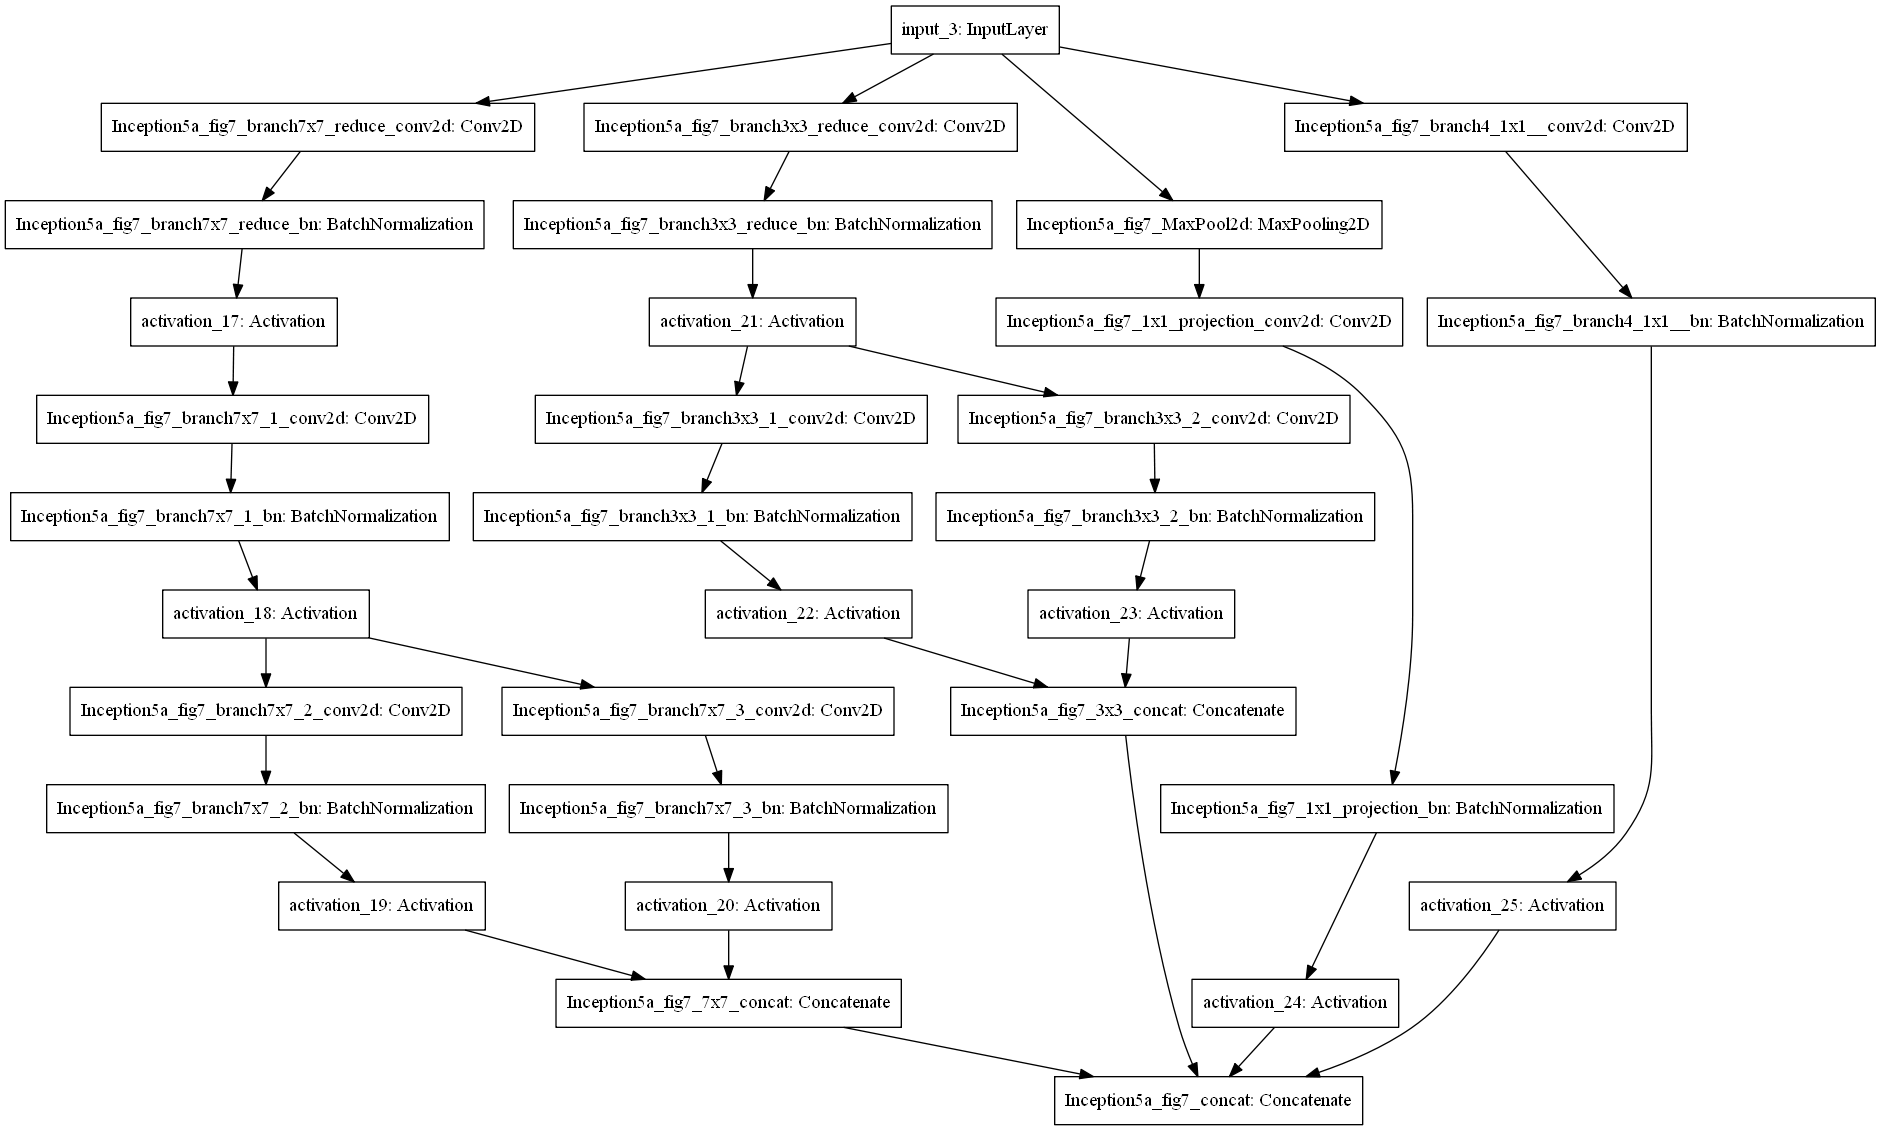

In [5]:
model7 = inception.GetInceptionNetOnFigure7()
plot_model(model7, to_file="Figure7_InceptionV3.png", show_shapes=False)

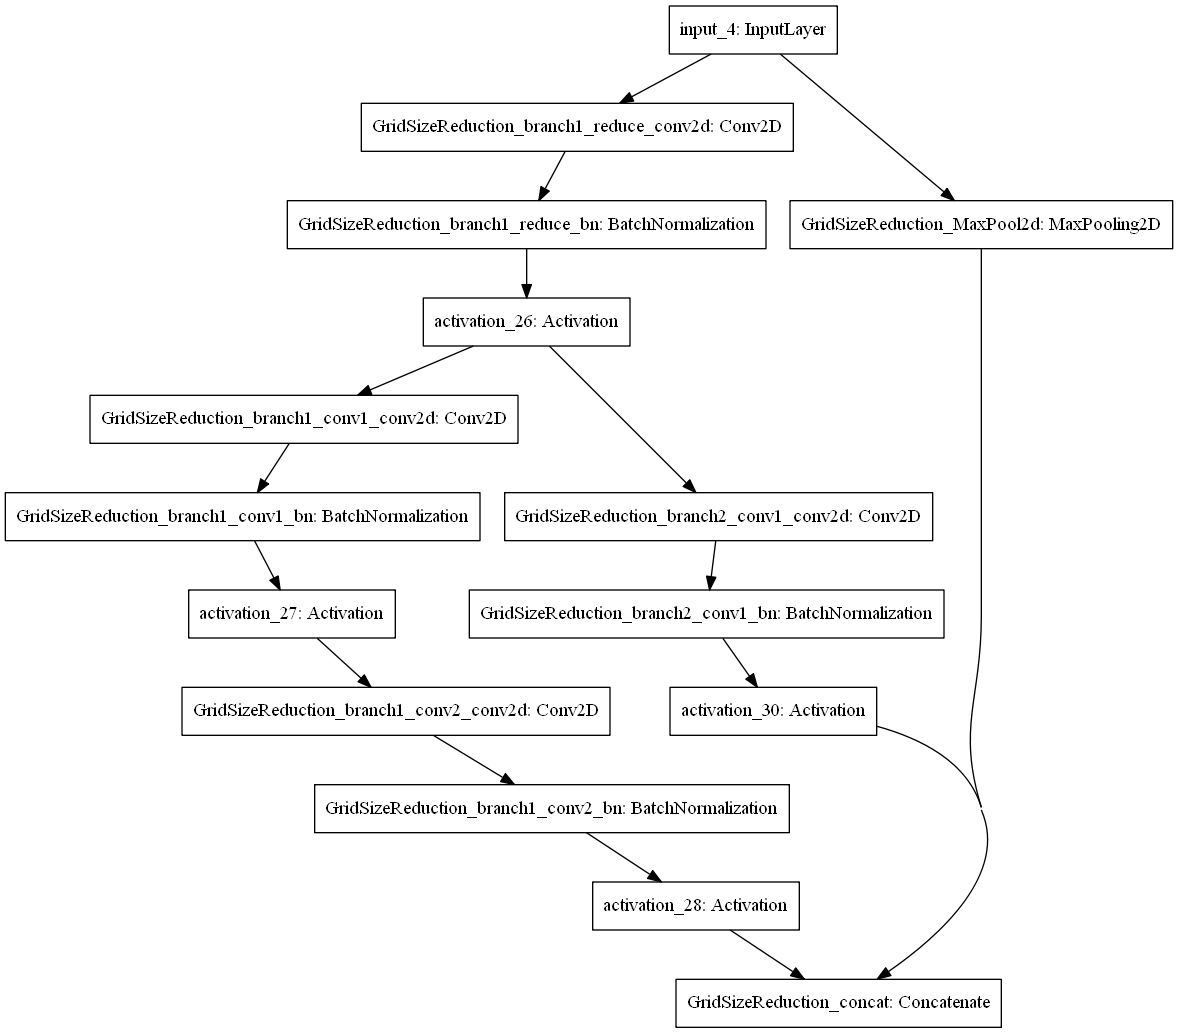

In [6]:
model10 = inception.GetInceptionNetOnFigure10()
plot_model(model10, to_file="Figure10_InceptionV3.png", show_shapes=False)

In [3]:
model_inception = inception.InceptionV3()

Model: "GoogLeNet_InceptionV3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
l1_conv2d (Conv2D)              (None, 149, 149, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
l1_bn (BatchNormalization)      (None, 149, 149, 32) 96          l1_conv2d[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           l1_bn[0][0]                      
______________________________________________________________________________

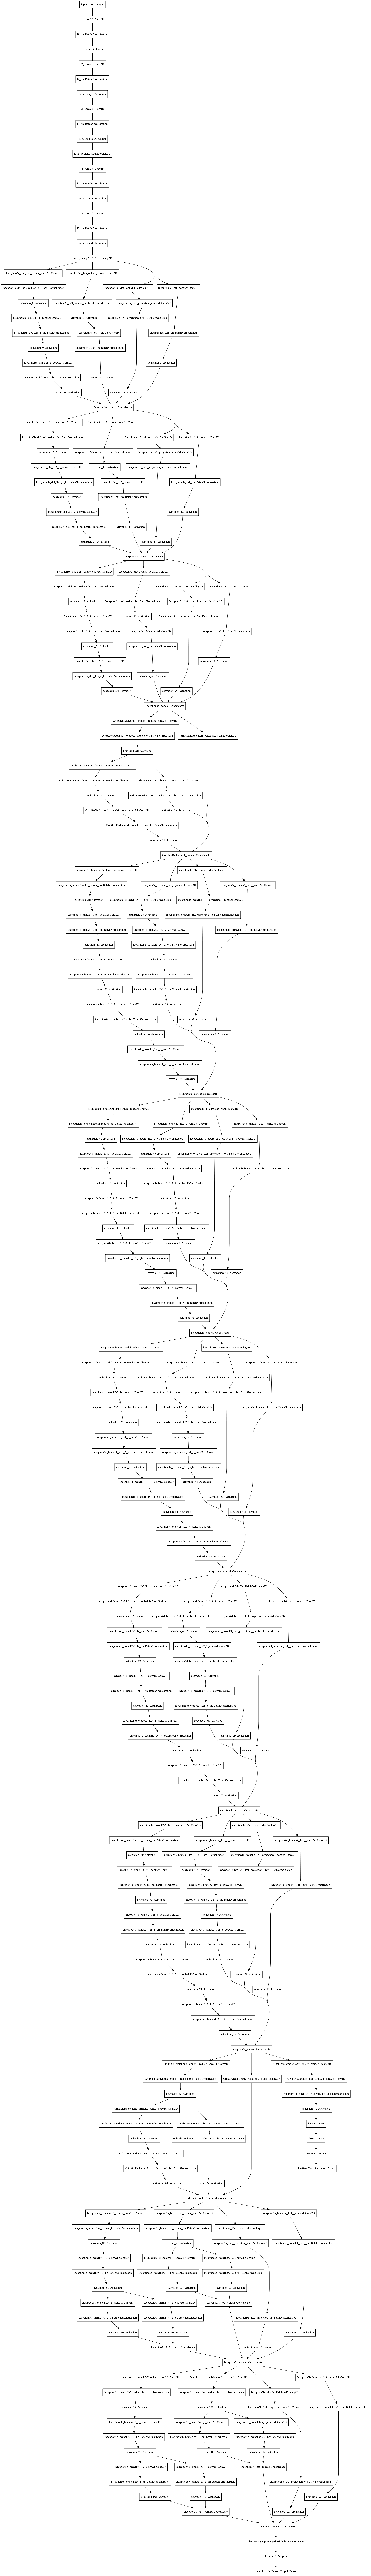

In [4]:
plot_model(model_inception, to_file="InceptionV3.png", show_shapes=False)